## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from sklearn import datasets

Using TensorFlow backend.


### 波士頓房價資料集目標為迴歸，建立回歸樹

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=42)

clf = DecisionTreeRegressor(max_depth=6, random_state=42, criterion='mse')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

### 筆記

Criterion: 衡量資料相似程度的 metric

Max_depth: 樹能生長的最深限制

Min_samples_split: 至少要多少樣本以上才進行切分

Min_samples_lear: 最終的葉子 (節點) 上至少要有多少樣本

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
print("Train Mean squared error:(交叉驗證) %.2f" %cross_val_score(clf, x_train, y_train, cv=5).mean())
print("Test Mean squared error: %.2f" %mean_squared_error(y_test, clf.predict(x_test)))

Train Mean squared error:(交叉驗證) 0.77
Test Mean squared error: 8.76


## 觀察特徵重要性

In [6]:
for i,v in enumerate(clf.feature_importances_):
    print(boston.feature_names[i]+':  %.5f' % v)

CRIM:  0.04183
ZN:  0.00000
INDUS:  0.00500
CHAS:  0.00000
NOX:  0.03084
RM:  0.59494
AGE:  0.00559
DIS:  0.07915
RAD:  0.00000
TAX:  0.00754
PTRATIO:  0.02113
B:  0.00724
LSTAT:  0.20674


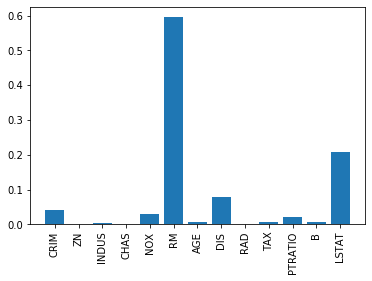

In [7]:
plt.bar([x for x in range(len(clf.feature_importances_))], clf.feature_importances_ )
plt.xticks([x for x in range(len(clf.feature_importances_))], boston.feature_names, rotation='vertical')
plt.show()

### 酒分類資料集目標為分類，建立分類樹

In [8]:
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
X_w = pd.DataFrame(wine.data, columns=[wine.feature_names])
X_w

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [10]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(X_w, wine.target, test_size=0.1, random_state=42)

clf_w = DecisionTreeClassifier(max_depth=20, random_state=42, criterion='gini')
clf_w.fit(x_train_w, y_train_w)

y_pred_w = clf_w.predict(x_test_w)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Train acc(交叉驗證平均)：', cross_val_score(clf_w, x_train_w, y_train_w, cv=5).mean())
print('Test acc：', accuracy_score(y_test_w, clf_w.predict(x_test_w)))

Train acc(交叉驗證平均)： 0.925
Test acc： 0.8888888888888888


## 觀察特徵重要性

In [12]:
for i,v in enumerate(clf_w.feature_importances_):
    print(wine.feature_names[i]+':  %.5f' % v)

alcohol:  0.01725
malic_acid:  0.00000
ash:  0.01863
alcalinity_of_ash:  0.00000
magnesium:  0.00000
total_phenols:  0.00000
flavanoids:  0.41093
nonflavanoid_phenols:  0.00000
proanthocyanins:  0.00000
color_intensity:  0.37755
hue:  0.00000
od280/od315_of_diluted_wines:  0.00000
proline:  0.17564


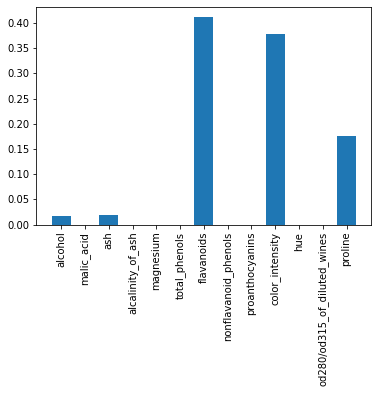

In [13]:
plt.bar([x for x in range(len(clf_w.feature_importances_))], clf_w.feature_importances_ )
plt.xticks([x for x in range(len(clf.feature_importances_))], wine.feature_names, rotation='vertical')
plt.show()